In [1]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 6.9 MB/s eta 0:00:00


In [2]:
# Common imports including dataframe management, mapping, file io, and helpers for extraction zips and tars
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import mapclassify

import seaborn as sns


import zipfile, tarfile
import os

# Specific imports to add custom legends
import matplotlib.lines as mlines

In [3]:
# Census 5mil scale national shapefile
# !curl -o us-states-shapefile.zip https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_all_5m.zip
!curl -o us-counties-shapefile.zip https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_county_500k.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.0M  100 11.0M    0     0  23.8M      0 --:--:-- --:--:-- --:--:-- 23.9M


In [4]:
# US Wind Turbine DB
!curl -o us-wind-turbines-shapefile.zip https://energy.usgs.gov/uswtdb/assets/data/uswtdbSHP.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3711k  100 3711k    0     0  8401k      0 --:--:-- --:--:-- --:--:-- 8396k


In [5]:
counties_zipfile = zipfile.ZipFile('us-counties-shapefile.zip')

us_counties_data_dirname = 'counties'
if not os.path.isdir(us_counties_data_dirname):
  os.mkdir(us_counties_data_dirname)
  counties_zipfile.extractall(us_counties_data_dirname)

# census_counties_zipfile = zipfile.ZipFile(os.path.join(us_counties_data_dirname, 'cb_2024_us_county_500k.zip'))
census_counties_dirname = us_counties_data_dirname
# if not os.path.isdir(census_counties_dirname):
#   os.mkdir(census_counties_dirname)
#   census_counties_zipfile.extractall(census_state_dirname)


In [6]:
zipfile = zipfile.ZipFile('us-wind-turbines-shapefile.zip')

wind_turbine_data_dirname = 'wind-turbine-data'
if not os.path.isdir(wind_turbine_data_dirname):
  os.mkdir(wind_turbine_data_dirname)

zipfile.extractall(wind_turbine_data_dirname)

In [7]:
counties_shpfile = 'cb_2024_us_county_500k.shp'
census_gdf = gpd.read_file(os.path.join(census_counties_dirname, counties_shpfile))
census_gdf

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,1501742250,4795418,"POLYGON ((-85.71209 31.19727, -85.70934 31.198..."
1,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900084,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,113,00161583,0500000US01113,01113,Russell,Russell County,AL,Alabama,06,1660653961,15562947,"POLYGON ((-85.4347 32.31761, -85.43384 32.3922..."
3,10,005,00217269,0500000US10005,10005,Sussex,Sussex County,DE,Delaware,06,2424590442,674129051,"POLYGON ((-75.7226 38.82986, -75.61542 38.8336..."
4,01,071,00161561,0500000US01071,01071,Jackson,Jackson County,AL,Alabama,06,2792044612,126334711,"MULTIPOLYGON (((-86.15423 34.53378, -86.14989 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,31,161,00835902,0500000US31161,31161,Sheridan,Sheridan County,NE,Nebraska,06,6320009952,76575663,"POLYGON ((-102.79287 42.82249, -102.79211 42.9..."
3231,17,119,00424258,0500000US17119,17119,Madison,Madison County,IL,Illinois,06,1853186559,63511490,"POLYGON ((-90.27544 38.93482, -90.27503 38.948..."
3232,28,155,00695798,0500000US28155,28155,Webster,Webster County,MS,Mississippi,06,1090793737,5364867,"POLYGON ((-89.50714 33.72182, -89.39365 33.721..."
3233,29,161,00758535,0500000US29161,29161,Phelps,Phelps County,MO,Missouri,06,1739921375,6564700,"POLYGON ((-92.02856 37.70684, -92.02682 37.707..."


In [8]:
census_gdf.query("STATE_NAME == 'Connecticut'")

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
17,09,190,02830254,0500000US09190,09190,Western Connecticut,Western Connecticut Planning Region,CT,Connecticut,PL,1378207191,300180641,"MULTIPOLYGON (((-73.36424 41.08894, -73.36176 ..."
297,09,170,02830252,0500000US09170,09170,South Central Connecticut,South Central Connecticut Planning Region,CT,Connecticut,PL,951177351,653525530,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
298,09,180,02830253,0500000US09180,09180,Southeastern Connecticut,Southeastern Connecticut Planning Region,CT,Connecticut,PL,1549172294,216453476,"MULTIPOLYGON (((-72.22593 41.29384, -72.22523 ..."
785,09,110,02830244,0500000US09110,09110,Capitol,Capitol Planning Region,CT,Connecticut,PL,2660835177,48773550,"POLYGON ((-72.95364 41.85392, -72.94634 41.874..."
932,09,140,02830249,0500000US09140,09140,Naugatuck Valley,Naugatuck Valley Planning Region,CT,Connecticut,PL,1069106360,22747873,"POLYGON ((-73.32684 41.48597, -73.32487 41.489..."
1417,09,130,02830246,0500000US09130,09130,Lower Connecticut River Valley,Lower Connecticut River Valley Planning Region,CT,Connecticut,PL,1098459139,241084217,"POLYGON ((-72.75294 41.5925, -72.74284 41.5944..."
1506,09,160,02830251,0500000US09160,09160,Northwest Hills,Northwest Hills Planning Region,CT,Connecticut,PL,2037392868,55597912,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."
2228,09,120,02830245,0500000US09120,09120,Greater Bridgeport,Greater Bridgeport Planning Region,CT,Connecticut,PL,363067866,253764138,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."
2906,09,150,02830250,0500000US09150,09150,Northeastern Connecticut,Northeastern Connecticut Planning Region,CT,Connecticut,PL,1434581261,23987846,"POLYGON ((-72.22328 41.98167, -72.21642 41.996..."


In [9]:
census_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOIDFQ', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry'],
      dtype='object')

### Map 1 - Wind Turbine locations in the United States

Layering a map of the shapefile from US Census Data and the shapefile of wind turbines from USGS.

In [10]:
tubrine_shpfile = 'uswtdb_V8_1_20250522.shp'
turbines_gdf = gpd.read_file(os.path.join(wind_turbine_data_dirname, tubrine_shpfile))
turbines_gdf.tail()

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_retrofit,t_retro_yr,t_offshore,t_conf_atr,t_conf_loc,t_img_date,t_img_src,xlong,ylat,geometry
76046,3137112,36-226842,2019-WTE-170-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.315376,42.528683,POINT (-78.31538 42.52868)
76047,3137060,36-226900,2019-WTE-9193-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.348793,42.526249,POINT (-78.34879 42.52625)
76048,3040944,48-024978,2011-WTW-352-OE,41364,-9999,TX,Young County,48503,unknown Young County 1,2011,...,0,-9999,0,1,3,2018-07-16,Maxar,-98.551094,33.093292,POINT (-98.55109 33.09329)
76049,3055917,08-072245,2015-WTW-9994-OE,-9999,-9999,CO,Yuma County,08125,unknown Yuma County,2016,...,0,-9999,0,1,3,2017-05-17,Maxar,-102.717171,40.035072,POINT (-102.71717 40.03507)
76050,3055918,08-072237,2015-WTW-9995-OE,-9999,-9999,CO,Yuma County,08125,unknown Yuma County,2016,...,0,-9999,0,1,3,2017-05-17,Maxar,-102.716949,40.037548,POINT (-102.71695 40.03755)


In [11]:
turbines_gdf.columns

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_retrofit',
       't_retro_yr', 't_offshore', 't_conf_atr', 't_conf_loc', 't_img_date',
       't_img_src', 'xlong', 'ylat', 'geometry'],
      dtype='object')

In [12]:
# FIPS codes/abbrv for US states and territories that are not on the mainland
# in order: Puerto Rico, Guam, American Samoa, Virgin Islands, Northern Mariana Islands, Alaska, Hawaii,
not_mainland_usa_fips = ["PR", "GU", "AS", "VI", "MP", "AK", "HI"]

census_gdf['STUSPS'] = census_gdf['STUSPS'].astype(str)
census_gdf = census_gdf.query("STUSPS not in @not_mainland_usa_fips")
census_gdf = census_gdf.reset_index(drop=True)
census_gdf


,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,1501742250,4795418,"POLYGON ((-85.71209 31.19727, -85.70934 31.198..."
1,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900084,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,113,00161583,0500000US01113,01113,Russell,Russell County,AL,Alabama,06,1660653961,15562947,"POLYGON ((-85.4347 32.31761, -85.43384 32.3922..."
3,10,005,00217269,0500000US10005,10005,Sussex,Sussex County,DE,Delaware,06,2424590442,674129051,"POLYGON ((-75.7226 38.82986, -75.61542 38.8336..."
4,01,071,00161561,0500000US01071,01071,Jackson,Jackson County,AL,Alabama,06,2792044612,126334711,"MULTIPOLYGON (((-86.15423 34.53378, -86.14989 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,31,161,00835902,0500000US31161,31161,Sheridan,Sheridan County,NE,Nebraska,06,6320009952,76575663,"POLYGON ((-102.79287 42.82249, -102.79211 42.9..."
3105,17,119,00424258,0500000US17119,17119,Madison,Madison County,IL,Illinois,06,1853186559,63511490,"POLYGON ((-90.27544 38.93482, -90.27503 38.948..."
3106,28,155,00695798,0500000US28155,28155,Webster,Webster County,MS,Mississippi,06,1090793737,5364867,"POLYGON ((-89.50714 33.72182, -89.39365 33.721..."
3107,29,161,00758535,0500000US29161,29161,Phelps,Phelps County,MO,Missouri,06,1739921375,6564700,"POLYGON ((-92.02856 37.70684, -92.02682 37.707..."


In [13]:
turbines_gdf['t_state'] = turbines_gdf['t_state'].astype(str)
turbines_gdf = turbines_gdf.query("t_state not in @not_mainland_usa_fips")
turbines_gdf = turbines_gdf.reset_index(drop=True)
turbines_gdf

,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_retrofit,t_retro_yr,t_offshore,t_conf_atr,t_conf_loc,t_img_date,t_img_src,xlong,ylat,geometry
0,3119490,40-097498,2021-WTW-7911-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.741096,36.423683,POINT (-99.7411 36.42368)
1,3124158,40-098166,2021-WTW-7917-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.796494,36.503357,POINT (-99.79649 36.50336)
2,3123358,40-098173,2021-WTW-7871-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.741119,36.502590,POINT (-99.74112 36.50259)
3,3123761,40-097539,2021-WTW-7888-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.771027,36.456665,POINT (-99.77103 36.45667)
4,3124023,40-097763,2021-WTW-7894-OE,-9999,65511,OK,Ellis County,40045,25 Mile Creek,2022,...,0,-9999,0,3,3,2023-01-04,Maxar,-99.775742,36.445465,POINT (-99.77574 36.44547)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75710,3137112,36-226842,2019-WTE-170-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.315376,42.528683,POINT (-78.31538 42.52868)
75711,3137060,36-226900,2019-WTE-9193-OE,-9999,-9999,NY,Wyoming County,36121,unknown Wyoming County,-9999,...,0,-9999,0,1,1,2023-01-24,Maxar,-78.348793,42.526249,POINT (-78.34879 42.52625)
75712,3040944,48-024978,2011-WTW-352-OE,41364,-9999,TX,Young County,48503,unknown Young County 1,2011,...,0,-9999,0,1,3,2018-07-16,Maxar,-98.551094,33.093292,POINT (-98.55109 33.09329)
75713,3055917,08-072245,2015-WTW-9994-OE,-9999,-9999,CO,Yuma County,08125,unknown Yuma County,2016,...,0,-9999,0,1,3,2017-05-17,Maxar,-102.717171,40.035072,POINT (-102.71717 40.03507)


<Axes: title={'center': 'Wind Turbine Locations'}>

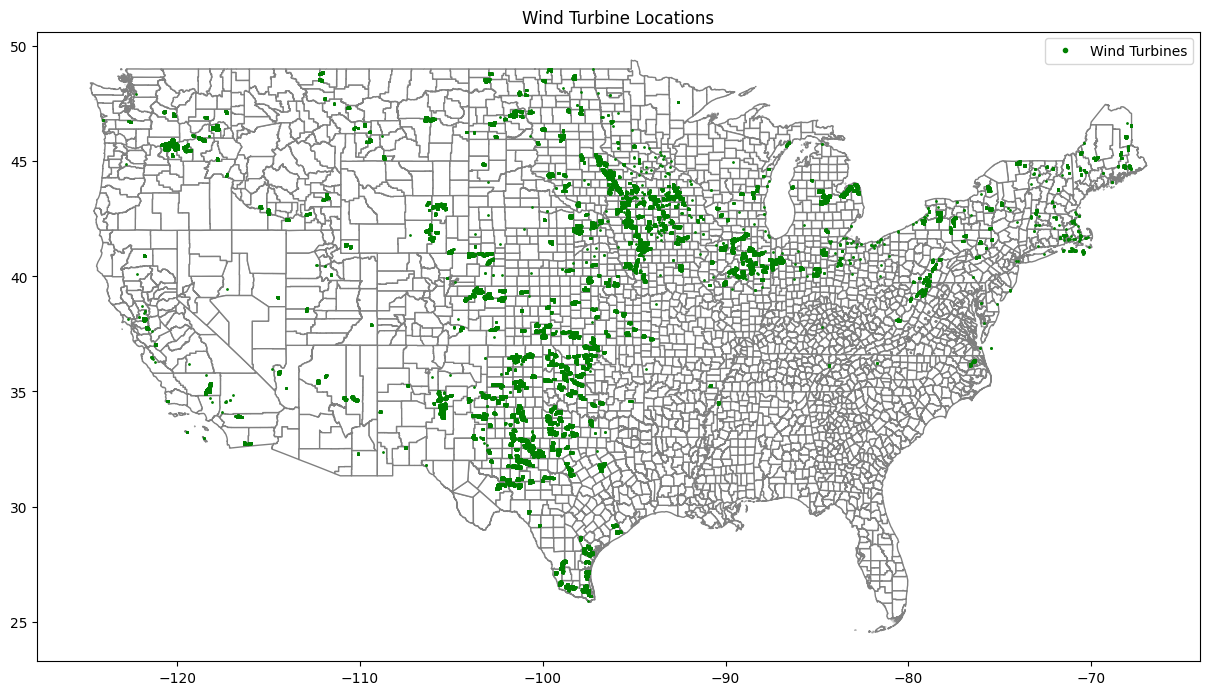

In [14]:
fig, ax = plt.subplots(1, figsize = (15, 10))

wind_turbine_legend = mlines.Line2D([], [], color='green', marker='o',
                          markersize=3, linestyle='', label='Wind Turbines')
ax.legend(handles=[wind_turbine_legend])
ax.set_title('Wind Turbine Locations')

census_gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=1)
turbines_gdf.plot(ax=ax, marker='o', color='green', markersize=1, legend=True)

### Map 2 - Average Wind Speed per county

From the wind supply curve dataset, we calculated the avg wind speed per county which is shown in the below map.

In [15]:
# Wind Supply curve from
!curl -o wind-speed.csv https://data.openei.org/files/6119/limited_access_2030_moderate_115hh_170rd_supply-curve.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8062k  100 8062k    0     0  24.3M      0 --:--:-- --:--:-- --:--:-- 24.4M


In [16]:
wind_speed_df = pd.read_csv('wind-speed.csv')
wind_speed_df = wind_speed_df.dropna()
wind_speed_df.head()

,area_sq_km,capacity_mw,cnty_fips,country,county,dist_km,elevation,latitude,lcot,longitude,...,reinforcement_dist_km,state,timezone,total_lcoe,trans_cap_cost_per_mw,reg_mult,turbine_capacity,sc_point_gid,hub_height,windspeed_m_per_s
0,2.5029,96.0,53009,United States,Clallam,50.203195,205.58824,48.347,25.766611,-124.653,...,380.864701,Washington,-8,51.562886,5.539306e+05,1.056176,6000,1543,115,7.75
1,2.1060,54.0,53009,United States,Clallam,45.533792,239.33333,48.376,39.346191,-124.495,...,380.864701,Washington,-8,67.125783,1.302007e+06,1.055045,6000,1544,115,7.32
2,12.6036,222.0,53009,United States,Clallam,35.910188,176.96875,48.253,30.781122,-124.604,...,380.864701,Washington,-8,60.455065,5.459865e+05,1.055727,6000,1923,115,6.90
3,4.8762,198.0,53009,United States,Clallam,85.679922,210.63333,48.282,22.736052,-124.447,...,312.365922,Washington,-8,50.302287,5.473159e+05,1.054523,6000,1924,115,7.20
4,3.3939,54.0,53009,United States,Clallam,46.208565,55.70000,48.131,39.202883,-124.712,...,380.864701,Washington,-8,71.840682,9.311974e+05,1.056586,6000,2302,115,6.65


In [17]:
wind_speed_df.columns

Index(['area_sq_km', 'capacity_mw', 'cnty_fips', 'country', 'county',
       'dist_km', 'elevation', 'latitude', 'lcot', 'longitude', 'mean_cf',
       'mean_lcoe', 'n_turbines', 'reinforcement_cost_per_mw',
       'reinforcement_dist_km', 'state', 'timezone', 'total_lcoe',
       'trans_cap_cost_per_mw', 'reg_mult', 'turbine_capacity', 'sc_point_gid',
       'hub_height', 'windspeed_m_per_s'],
      dtype='object')

In [18]:
grouped_by_state = wind_speed_df.groupby('county')
avg_wind_speeds_per_county_df = pd.DataFrame(grouped_by_state['windspeed_m_per_s'].mean()).reset_index('county')
avg_wind_speeds_per_county_df

,county,windspeed_m_per_s
0,Abbeville,5.715714
1,Acadia,6.497500
2,Ada,5.635000
3,Adair,7.932000
4,Adams,6.707295
...,...,...
1479,Yuba,5.330000
1480,Yuma,6.485104
1481,Zapata,7.394500
1482,Zavala,6.686071


In [19]:
result = census_gdf.merge(avg_wind_speeds_per_county_df, how='outer', left_on='NAME', right_on='county', indicator=True)
result

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,county,windspeed_m_per_s,_merge
0,45,001,01245666,0500000US45001,45001,Abbeville,Abbeville County,SC,South Carolina,06,1.272189e+09,5.321642e+07,"POLYGON ((-82.74202 34.21175, -82.68378 34.248...",Abbeville,5.715714,both
1,22,001,00558389,0500000US22001,22001,Acadia,Acadia Parish,LA,Louisiana,15,1.697074e+09,5.934788e+06,"POLYGON ((-92.63229 30.31708, -92.62923 30.318...",Acadia,6.497500,both
2,51,001,01480091,0500000US51001,51001,Accomack,Accomack County,VA,Virginia,06,1.163689e+09,2.229297e+09,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",NaN,NaN,left_only
3,16,001,00395066,0500000US16001,16001,Ada,Ada County,ID,Idaho,06,2.725232e+09,2.212187e+07,"POLYGON ((-116.51362 43.38654, -116.51353 43.4...",Ada,5.635000,both
4,40,001,01101788,0500000US40001,40001,Adair,Adair County,OK,Oklahoma,06,1.486346e+09,8.864933e+06,"POLYGON ((-94.80774 35.66023, -94.80772 35.674...",Adair,7.932000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,04,027,00023901,0500000US04027,04027,Yuma,Yuma County,AZ,Arizona,06,1.428073e+10,1.324285e+07,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",Yuma,6.485104,both
3107,08,125,00198178,0500000US08125,08125,Yuma,Yuma County,CO,Colorado,06,6.123764e+09,1.113420e+07,"POLYGON ((-102.80377 40.00255, -102.7933 40.00...",Yuma,6.485104,both
3108,48,505,01384038,0500000US48505,48505,Zapata,Zapata County,TX,Texas,06,2.585876e+09,1.543712e+08,"POLYGON ((-99.4538 27.26506, -99.42542 27.2836...",Zapata,7.394500,both
3109,48,507,01384039,0500000US48507,48507,Zavala,Zavala County,TX,Texas,06,3.360269e+09,1.120871e+07,"POLYGON ((-100.11314 28.77625, -100.11329 28.7...",Zavala,6.686071,both


In [20]:
result.query('`_merge` == "right_only"')

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,county,windspeed_m_per_s,_merge
2038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,New London,7.69,right_only
2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Tolland,7.77,right_only


In [21]:
# states_condensed_gdf = states_gdf[['GEOIDFQ', 'GEOID', 'STUSPS', 'NAME',  'geometry']]

avg_wind_speed_per_county_gdf = census_gdf.merge(avg_wind_speeds_per_county_df, how='left', left_on='NAME', right_on='county', indicator=True)

Text(0.5, 1.0, 'Average Wind Speed')

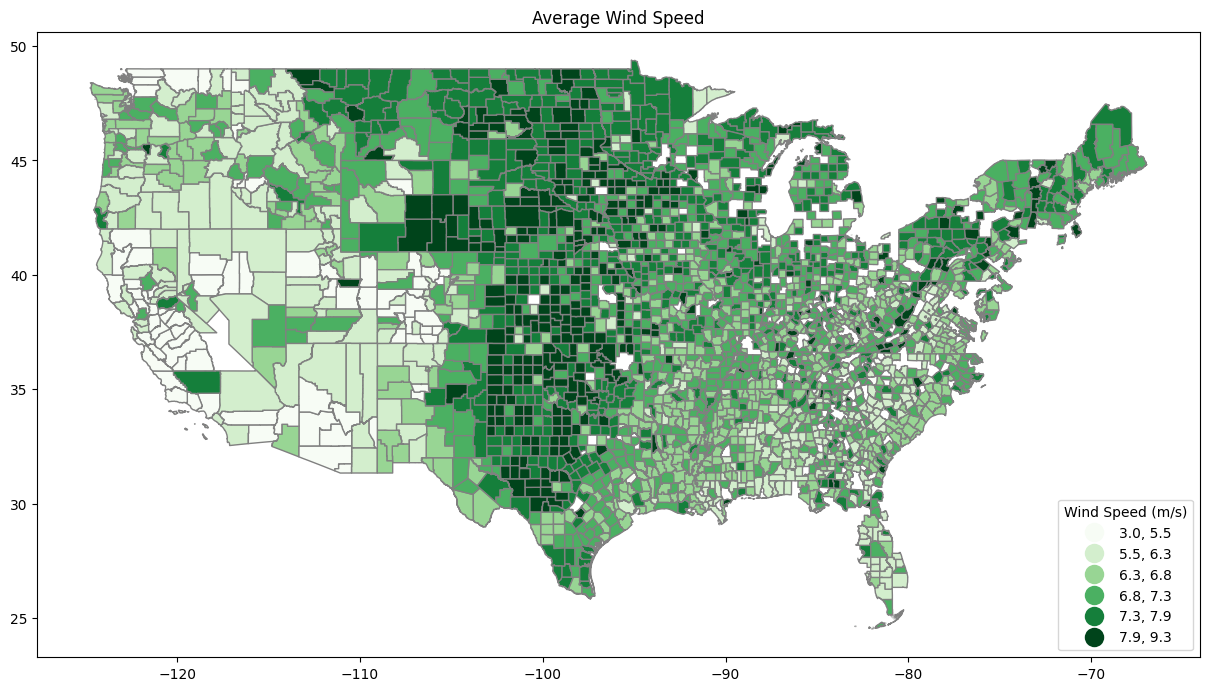

In [22]:
fig, ax = plt.subplots(1, figsize = (15, 10))
avg_wind_speed_per_county_gdf.plot(ax=ax, column='windspeed_m_per_s', legend=True,
                                    scheme='natural_breaks', k=6, cmap='Greens',
                                    edgecolor='grey',
                                    legend_kwds={"fmt": "{:,.1f}",'loc':'lower right','markerscale':1.4})

leg = ax.get_legend()
leg.set_title('Wind Speed (m/s)')
ax.set_title('Average Wind Speed')

### Map 3 - Number of wind turbines per county

Using the Wind Turbine Database again, we can calculate the total number of wind turbines in each county and map them categorically.

In [23]:
turbine_counts_df = pd.DataFrame(turbines_gdf.groupby('t_county')['case_id'].count()).reset_index('t_county')
turbine_counts_df

,t_county,case_id
0,Adair County,613
1,Adams County,240
2,Addison County,1
3,Alameda County,328
4,Albany County,208
...,...,...
553,Yellowstone County,1
554,Yolo County,1
555,Young County,221
556,Yuma County,3


In [24]:
turbine_counts_df.sort_values(by='case_id')
turbine_counts_df

,t_county,case_id
0,Adair County,613
1,Adams County,240
2,Addison County,1
3,Alameda County,328
4,Albany County,208
...,...,...
553,Yellowstone County,1
554,Yolo County,1
555,Young County,221
556,Yuma County,3


In [25]:
census_gdf.merge(turbine_counts_df, left_on='NAMELSAD', right_on='t_county', how='outer', indicator=True)

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,t_county,case_id,_merge
0,45,001,01245666,0500000US45001,45001,Abbeville,Abbeville County,SC,South Carolina,06,1.272189e+09,5.321642e+07,"POLYGON ((-82.74202 34.21175, -82.68378 34.248...",NaN,NaN,left_only
1,22,001,00558389,0500000US22001,22001,Acadia,Acadia Parish,LA,Louisiana,15,1.697074e+09,5.934788e+06,"POLYGON ((-92.63229 30.31708, -92.62923 30.318...",NaN,NaN,left_only
2,51,001,01480091,0500000US51001,51001,Accomack,Accomack County,VA,Virginia,06,1.163689e+09,2.229297e+09,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",NaN,NaN,left_only
3,16,001,00395066,0500000US16001,16001,Ada,Ada County,ID,Idaho,06,2.725232e+09,2.212187e+07,"POLYGON ((-116.51362 43.38654, -116.51353 43.4...",NaN,NaN,left_only
4,40,001,01101788,0500000US40001,40001,Adair,Adair County,OK,Oklahoma,06,1.486346e+09,8.864933e+06,"POLYGON ((-94.80774 35.66023, -94.80772 35.674...",Adair County,613.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,04,027,00023901,0500000US04027,04027,Yuma,Yuma County,AZ,Arizona,06,1.428073e+10,1.324285e+07,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",Yuma County,3.0,both
3108,08,125,00198178,0500000US08125,08125,Yuma,Yuma County,CO,Colorado,06,6.123764e+09,1.113420e+07,"POLYGON ((-102.80377 40.00255, -102.7933 40.00...",Yuma County,3.0,both
3109,48,505,01384038,0500000US48505,48505,Zapata,Zapata County,TX,Texas,06,2.585876e+09,1.543712e+08,"POLYGON ((-99.4538 27.26506, -99.42542 27.2836...",Zapata County,110.0,both
3110,48,507,01384039,0500000US48507,48507,Zavala,Zavala County,TX,Texas,06,3.360269e+09,1.120871e+07,"POLYGON ((-100.11314 28.77625, -100.11329 28.7...",NaN,NaN,left_only


In [26]:
merged = census_gdf.merge(turbine_counts_df, left_on='NAMELSAD', right_on='t_county', how='outer', indicator=True)

In [27]:
right_merge_indicator = "right_only"
merged.query("_merge == @right_merge_indicator")

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,t_county,case_id,_merge
1669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Litchfield County,2.0,right_only
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NA,62.0,right_only
2039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,New Haven County,1.0,right_only


In [28]:
# Some counties have no turbine data, setting their data to 0 after merging

turbines_per_county_gdf = census_gdf.merge(turbine_counts_df, left_on='NAMELSAD', right_on='t_county', how='left', indicator=True)
turbines_per_county_gdf.fillna(value={'case_id': '0.0'}, inplace=True)
turbines_per_county_gdf['case_id'] = pd.to_numeric(turbines_per_county_gdf['case_id'])
turbines_per_county_gdf.rename(columns={'case_id': 'turbine_count'}, inplace=True)
turbines_per_county_gdf

,STATEFP,COUNTYFP,COUNTYNS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,t_county,turbine_count,_merge
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,1501742250,4795418,"POLYGON ((-85.71209 31.19727, -85.70934 31.198...",NaN,0.0,left_only
1,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900084,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930...",NaN,0.0,left_only
2,01,113,00161583,0500000US01113,01113,Russell,Russell County,AL,Alabama,06,1660653961,15562947,"POLYGON ((-85.4347 32.31761, -85.43384 32.3922...",NaN,0.0,left_only
3,10,005,00217269,0500000US10005,10005,Sussex,Sussex County,DE,Delaware,06,2424590442,674129051,"POLYGON ((-75.7226 38.82986, -75.61542 38.8336...",Sussex County,1.0,both
4,01,071,00161561,0500000US01071,01071,Jackson,Jackson County,AL,Alabama,06,2792044612,126334711,"MULTIPOLYGON (((-86.15423 34.53378, -86.14989 ...",Jackson County,349.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,31,161,00835902,0500000US31161,31161,Sheridan,Sheridan County,NE,Nebraska,06,6320009952,76575663,"POLYGON ((-102.79287 42.82249, -102.79211 42.9...",NaN,0.0,left_only
3105,17,119,00424258,0500000US17119,17119,Madison,Madison County,IL,Illinois,06,1853186559,63511490,"POLYGON ((-90.27544 38.93482, -90.27503 38.948...",Madison County,154.0,both
3106,28,155,00695798,0500000US28155,28155,Webster,Webster County,MS,Mississippi,06,1090793737,5364867,"POLYGON ((-89.50714 33.72182, -89.39365 33.721...",Webster County,220.0,both
3107,29,161,00758535,0500000US29161,29161,Phelps,Phelps County,MO,Missouri,06,1739921375,6564700,"POLYGON ((-92.02856 37.70684, -92.02682 37.707...",NaN,0.0,left_only


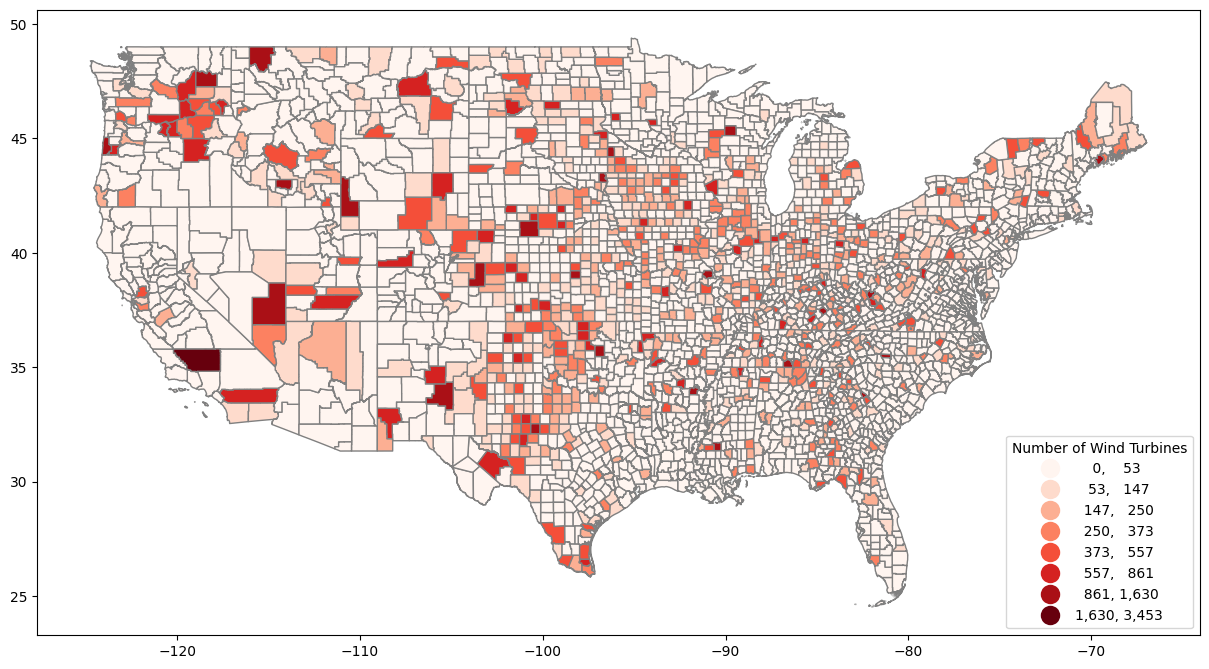

In [29]:
fig, ax = plt.subplots(1, figsize = (15, 10))
turbines_per_county_gdf.plot(ax=ax, column='turbine_count', legend=True,
                                    scheme='natural_breaks', k=8, cmap='Reds',
                                    edgecolor='grey',
                                    legend_kwds={"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})

leg = ax.get_legend()
leg.set_title('Number of Wind Turbines')

### Map 4 - Wind Energy Production relative to Total Energy Production

We want to see how much of each state's energy production is coming from wind energy sources.

The US Energy Information Administration provides historical data on power production and consumptions across various sources like Gas, Fossil Fuels, and renewable sources like Hydryoelectric and Wind.

In [30]:
# Historical Energy production and consumption statistic per State from US Energy Information Administration - https://www.eia.gov/electricity/data/state/
!curl -o energy-consumption.xls 'https://www.eia.gov/electricity/data/state/existcapacity_annual.xlsx'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2465k  100 2465k    0     0  4185k      0 --:--:-- --:--:-- --:--:-- 4193k


In [31]:
energy_production_df = pd.read_excel('energy-consumption.xls', skiprows=1)
energy_production_df.tail()

,Year,State Code,Producer Type,Fuel Source,Generators,Facilities,Nameplate Capacity (Megawatts),Summer Capacity (Megawatts)
55885,2024,WY,Total Electric Power Industry,Other,3.0,2.0,13.3,13.3
55886,2024,WY,Total Electric Power Industry,Other Gases,4.0,2.0,3.7,3.3
55887,2024,WY,Total Electric Power Industry,Petroleum,4.0,3.0,5.8,5.8
55888,2024,WY,Total Electric Power Industry,Solar Thermal and Photovoltaic,2.0,2.0,242.0,242
55889,2024,WY,Total Electric Power Industry,Wind,30.0,26.0,3727.0,3603.9


In [32]:
energy_production_df.dtypes

,0
Year,int64
State Code,object
Producer Type,object
Fuel Source,object
Generators,float64
Facilities,float64
Nameplate Capacity (Megawatts),float64
Summer Capacity (Megawatts),object


In [33]:
energy_production_df = energy_production_df.query("Year == 2024 and `Producer Type` == 'Total Electric Power Industry'")
energy_production_df.head()



,Year,State Code,Producer Type,Fuel Source,Generators,Facilities,Nameplate Capacity (Megawatts),Summer Capacity (Megawatts)
54023,2024,AK,Total Electric Power Industry,All Sources,556.0,152.0,3107.4,2853.4
54024,2024,AK,Total Electric Power Industry,Coal,16.0,5.0,187.5,167.9
54025,2024,AK,Total Electric Power Industry,Hydroelectric,65.0,33.0,481.8,476.3
54026,2024,AK,Total Electric Power Industry,Natural Gas,57.0,14.0,1391.4,1257.5
54027,2024,AK,Total Electric Power Industry,Other,8.0,8.0,134.8,134.8


In [34]:
wind_energy_production_df = energy_production_df.query('`Fuel Source` == "Wind"')
wind_energy_production_df['State Code'] = wind_energy_production_df['State Code'].astype(str)
wind_energy_production_df.head()

/tmp/ipython-input-1124887077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_energy_production_df['State Code'] = wind_energy_production_df['State Code'].astype(str)


,Year,State Code,Producer Type,Fuel Source,Generators,Facilities,Nameplate Capacity (Megawatts),Summer Capacity (Megawatts)
54031,2024,AK,Total Electric Power Industry,Wind,22.0,7.0,59.6,59
54130,2024,AZ,Total Electric Power Industry,Wind,9.0,9.0,1234.5,1234.5
54189,2024,CA,Total Electric Power Industry,Wind,128.0,111.0,6487.2,6456.8
54231,2024,CO,Total Electric Power Industry,Wind,42.0,34.0,5378.8,5336.7
54267,2024,CT,Total Electric Power Industry,Wind,1.0,1.0,5.0,5


In [35]:
# Find out which states in the energy production dataset is missing from the total list of states available in the census data
total_states = list(map(str ,census_gdf['STUSPS']))

missing_states = set([state for state in energy_production_df['State Code'].astype(str) if state not in total_states])
missing_states

{'AK', 'HI', 'US'}

In [36]:
# Download the census states shapefile
!curl -o us-states-shapefile.zip https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_all_5m.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.9M  100 25.9M    0     0  67.8M      0 --:--:-- --:--:-- --:--:-- 67.7M


In [37]:
import zipfile

states_zipfile = zipfile.ZipFile('us-states-shapefile.zip')

us_states_data_dirname = 'states'
if not os.path.isdir(us_states_data_dirname):
  os.mkdir(us_states_data_dirname)
  states_zipfile.extractall(us_states_data_dirname)

census_state_zipfile = zipfile.ZipFile(os.path.join(us_states_data_dirname, 'cb_2024_us_state_5m.zip'))
census_state_dirname = os.path.join(us_states_data_dirname, 'census_state_5m')
if not os.path.isdir(census_state_dirname):
  os.mkdir(census_state_dirname)
  census_state_zipfile.extractall(census_state_dirname)

states_shpfile = 'cb_2024_us_state_5m.shp'
states_gdf = gpd.read_file(os.path.join(census_state_dirname, states_shpfile))

In [38]:
not_mainland_usa_fips = ["PR", "GU", "AS", "VI", "MP", "AK", "HI"]

states_gdf["STUSPS"] = states_gdf["STUSPS"].astype(str)
states_gdf = states_gdf.query("STUSPS not in @not_mainland_usa_fips")
states_gdf = states_gdf.reset_index(drop=True)
states_gdf.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,48,01779801,0400000US48,48,TX,Texas,00,676656702022,19011620342,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105824130554,10274225585,"MULTIPOLYGON (((-82.7328 41.60432, -82.72107 4..."
4,13,01705317,0400000US13,13,GA,Georgia,00,149485762701,4419221858,"POLYGON ((-85.60516 34.98468, -85.5142 34.9835..."


In [39]:
census_centroids_gdf = states_gdf.copy(deep=True)
census_centroids_gdf['geometry'] = census_centroids_gdf['geometry'].centroid
census_centroids_gdf.head()

/tmp/ipython-input-3235522393.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  census_centroids_gdf['geometry'] = census_centroids_gdf['geometry'].centroid


,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,POINT (-106.10838 34.42136)
1,48,01779801,0400000US48,48,TX,Texas,00,676656702022,19011620342,POINT (-99.34976 31.48296)
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266755818,2384136185,POINT (-85.29057 37.52666)
3,39,01085497,0400000US39,39,OH,Ohio,00,105824130554,10274225585,POINT (-82.79013 40.29321)
4,13,01705317,0400000US13,13,GA,Georgia,00,149485762701,4419221858,POINT (-83.44601 32.64911)


In [40]:
all_sources_production_df = energy_production_df.query("`Fuel Source` == 'All Sources'")
all_sources_production_df.head()

,Year,State Code,Producer Type,Fuel Source,Generators,Facilities,Nameplate Capacity (Megawatts),Summer Capacity (Megawatts)
54023,2024,AK,Total Electric Power Industry,All Sources,556.0,152.0,3107.4,2853.4
54049,2024,AL,Total Electric Power Industry,All Sources,274.0,77.0,32810.4,30995.7
54085,2024,AR,Total Electric Power Industry,All Sources,212.0,112.0,17922.3,15906.8
54120,2024,AZ,Total Electric Power Industry,All Sources,408.0,173.0,36344.9,32876.5
54177,2024,CA,Total Electric Power Industry,All Sources,3018.0,1790.0,101974.8,96773.2


In [41]:
relative_wind_production_percent_df = pd.merge(left=all_sources_production_df, right=wind_energy_production_df, left_on='State Code', right_on="State Code", indicator=True, suffixes=('_all', '_wind'))
relative_wind_production_percent_df.head()

,Year_all,State Code,Producer Type_all,Fuel Source_all,Generators_all,Facilities_all,Nameplate Capacity (Megawatts)_all,Summer Capacity (Megawatts)_all,Year_wind,Producer Type_wind,Fuel Source_wind,Generators_wind,Facilities_wind,Nameplate Capacity (Megawatts)_wind,Summer Capacity (Megawatts)_wind,_merge
0,2024,AK,Total Electric Power Industry,All Sources,556.0,152.0,3107.4,2853.4,2024,Total Electric Power Industry,Wind,22.0,7.0,59.6,59,both
1,2024,AZ,Total Electric Power Industry,All Sources,408.0,173.0,36344.9,32876.5,2024,Total Electric Power Industry,Wind,9.0,9.0,1234.5,1234.5,both
2,2024,CA,Total Electric Power Industry,All Sources,3018.0,1790.0,101974.8,96773.2,2024,Total Electric Power Industry,Wind,128.0,111.0,6487.2,6456.8,both
3,2024,CO,Total Electric Power Industry,All Sources,482.0,303.0,21646.7,19816.6,2024,Total Electric Power Industry,Wind,42.0,34.0,5378.8,5336.7,both
4,2024,CT,Total Electric Power Industry,All Sources,303.0,171.0,10827.9,9994.1,2024,Total Electric Power Industry,Wind,1.0,1.0,5.0,5,both


In [42]:
def calc_relative_production_capacity(total_capacity: float, wind_capacity: float) -> float:
  return (wind_capacity / total_capacity) * 100.0


relative_wind_production_percent_df['Relative Wind Energy Name Plate Capacity'] = relative_wind_production_percent_df.apply(lambda row: calc_relative_production_capacity(row['Nameplate Capacity (Megawatts)_all'], row['Nameplate Capacity (Megawatts)_wind']), axis=1)
relative_wind_production_percent_df.head()

,Year_all,State Code,Producer Type_all,Fuel Source_all,Generators_all,Facilities_all,Nameplate Capacity (Megawatts)_all,Summer Capacity (Megawatts)_all,Year_wind,Producer Type_wind,Fuel Source_wind,Generators_wind,Facilities_wind,Nameplate Capacity (Megawatts)_wind,Summer Capacity (Megawatts)_wind,_merge,Relative Wind Energy Name Plate Capacity
0,2024,AK,Total Electric Power Industry,All Sources,556.0,152.0,3107.4,2853.4,2024,Total Electric Power Industry,Wind,22.0,7.0,59.6,59,both,1.918002
1,2024,AZ,Total Electric Power Industry,All Sources,408.0,173.0,36344.9,32876.5,2024,Total Electric Power Industry,Wind,9.0,9.0,1234.5,1234.5,both,3.396625
2,2024,CA,Total Electric Power Industry,All Sources,3018.0,1790.0,101974.8,96773.2,2024,Total Electric Power Industry,Wind,128.0,111.0,6487.2,6456.8,both,6.361572
3,2024,CO,Total Electric Power Industry,All Sources,482.0,303.0,21646.7,19816.6,2024,Total Electric Power Industry,Wind,42.0,34.0,5378.8,5336.7,both,24.848129
4,2024,CT,Total Electric Power Industry,All Sources,303.0,171.0,10827.9,9994.1,2024,Total Electric Power Industry,Wind,1.0,1.0,5.0,5,both,0.046177


In [43]:
relative_wind_production_percent_df = relative_wind_production_percent_df[["State Code", "Nameplate Capacity (Megawatts)_all", "Nameplate Capacity (Megawatts)_wind", "Relative Wind Energy Name Plate Capacity"]]
relative_wind_production_percent_df.head()

,State Code,Nameplate Capacity (Megawatts)_all,Nameplate Capacity (Megawatts)_wind,Relative Wind Energy Name Plate Capacity
0,AK,3107.4,59.6,1.918002
1,AZ,36344.9,1234.5,3.396625
2,CA,101974.8,6487.2,6.361572
3,CO,21646.7,5378.8,24.848129
4,CT,10827.9,5.0,0.046177


In [44]:
relative_wind_production_per_state = census_centroids_gdf.merge(relative_wind_production_percent_df, left_on="STUSPS", right_on="State Code", indicator=True)
relative_wind_production_per_state

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State Code,Nameplate Capacity (Megawatts)_all,Nameplate Capacity (Megawatts)_wind,Relative Wind Energy Name Plate Capacity,_merge
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198519809,726531289,POINT (-106.10838 34.42136),NM,12932.3,4429.0,34.247582,both
1,48,01779801,0400000US48,48,TX,Texas,00,676656702022,19011620342,POINT (-99.34976 31.48296),TX,179581.2,42282.9,23.545282,both
2,39,01085497,0400000US39,39,OH,Ohio,00,105824130554,10274225585,POINT (-82.79013 40.29321),OH,33145.1,1106.8,3.339257,both
3,41,01155107,0400000US41,41,OR,Oregon,00,248630421366,6168761370,POINT (-120.55517 43.93666),OR,18441.5,3980.9,21.586639,both
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115881476238,3397613881,POINT (-77.7996 40.87389),PA,52838.4,1556.0,2.944828,both
5,29,01779791,0400000US29,29,MO,Missouri,00,178052403953,2487375487,POINT (-92.47742 38.36766),MO,22260.2,2453.7,11.022812,both
6,37,01027616,0400000US37,37,NC,North Carolina,00,125935965771,13453455061,POINT (-79.35776 35.53984),NC,39630.5,397.0,1.001754,both
7,49,01455989,0400000US49,49,UT,Utah,00,213921882299,5963163952,POINT (-111.6782 39.32379),UT,10686.4,389.7,3.646691,both
8,51,01779803,0400000US51,51,VA,Virginia,00,102256342555,8529908321,POINT (-78.80853 37.51527),VA,30798.1,12.0,0.038963,both
9,56,01779807,0400000US56,56,WY,Wyoming,00,251458190512,1868025485,POINT (-107.55148 42.99965),WY,11755.1,3727.0,31.705387,both


In [45]:
relative_wind_production_per_state['_merge'].value_counts()

,count
_merge,
both,41
left_only,0
right_only,0


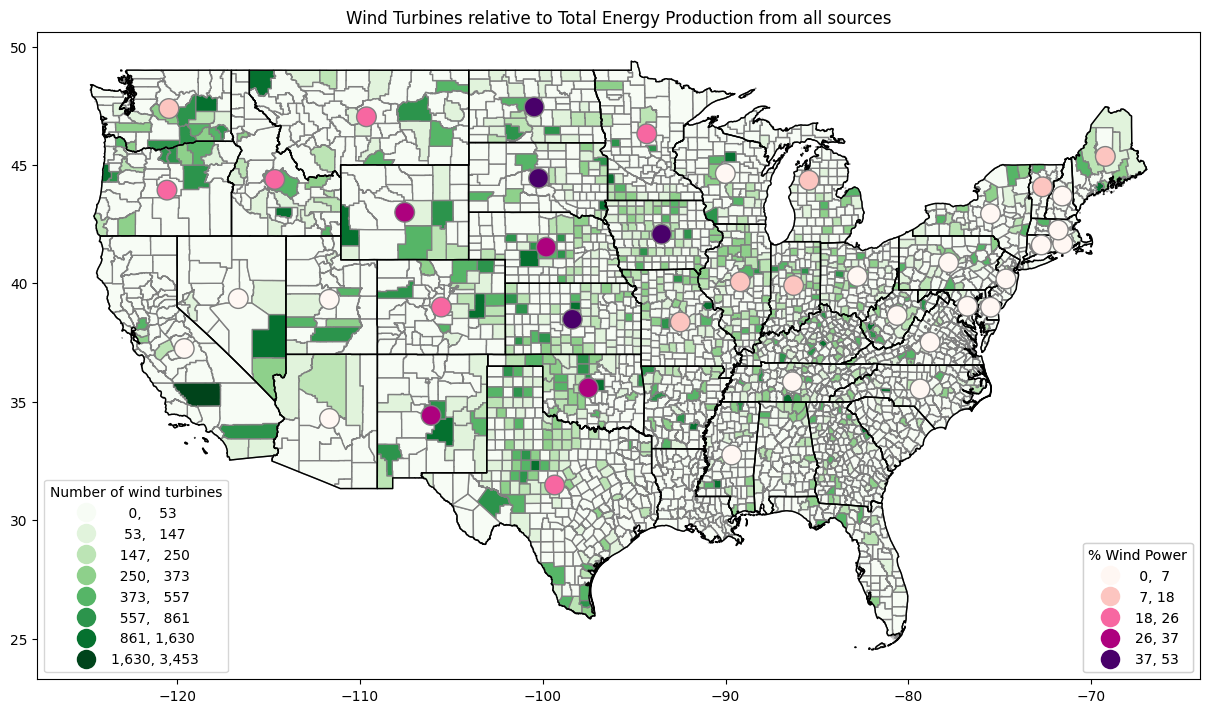

In [50]:
# Wind Power production rate vs number of wind turbines per county

fig, ax = plt.subplots(1, figsize = (15, 10))

turbines_per_county_gdf.plot(ax=ax, column='turbine_count', legend=True,
                                    scheme='natural_breaks', k=8, cmap='Greens',
                                    edgecolor='grey',
                                    legend_kwds={"fmt": "{:,.0f}",'loc':'lower left','markerscale':1.4})

leg_turbines = ax.get_legend()
leg_turbines.set_title('Number of wind turbines')

# Draw the state boundary so that the delineation is clearer
states_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

relative_wind_production_per_state.plot(ax=ax, column='Relative Wind Energy Name Plate Capacity', legend=True,
                                    scheme='natural_breaks', k=5, cmap='RdPu',
                                    edgecolor='grey', linewidth=1,
                                    legend_kwds={"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4},
                                    markersize=200)

leg_production = ax.get_legend()
leg_production.set_title('% Wind Power')

ax.set_title("Wind Turbines relative to Total Energy Production from all sources")
ax.add_artist(leg_turbines)
ax.add_artist(leg_production)

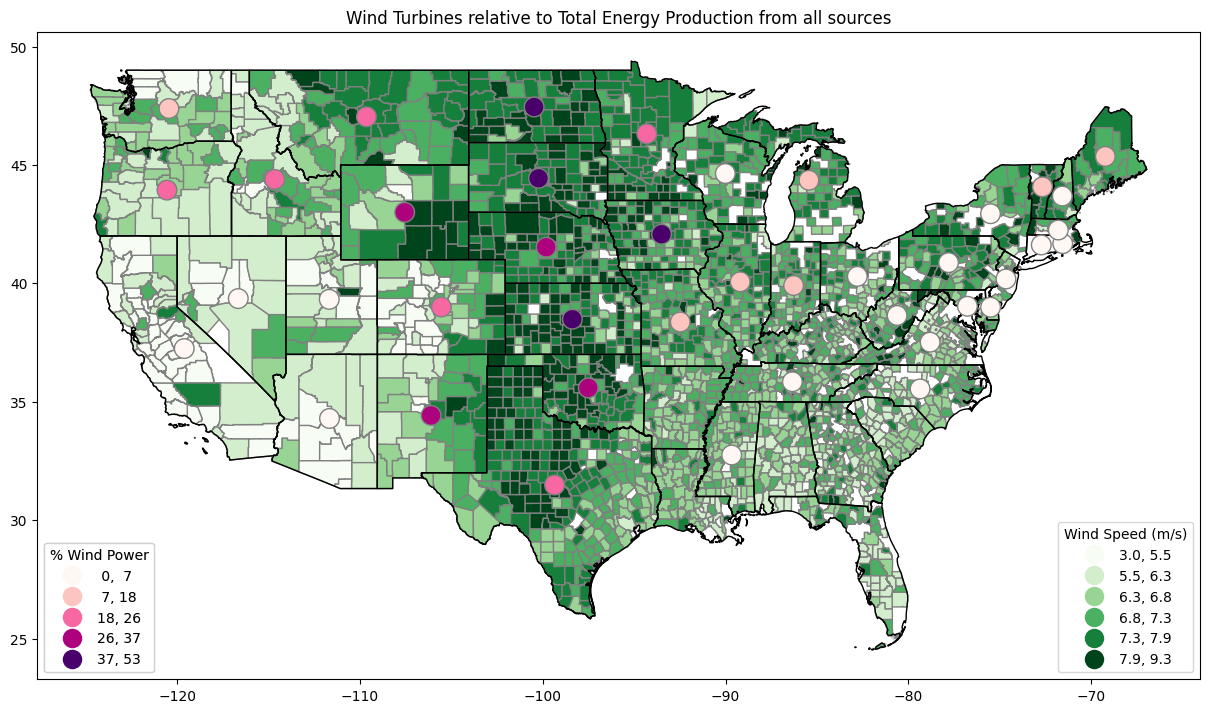

In [49]:
# Wind Power production share vs Wind Resource availability

import matplotlib.colors as mcolors

fig, ax = plt.subplots(1, figsize = (15, 10))

avg_wind_speed_per_county_gdf.plot(ax=ax, column='windspeed_m_per_s', legend=True,
                                    scheme='natural_breaks', k=6, cmap='Greens',
                                    edgecolor='grey',
                                    legend_kwds={"fmt": "{:,.1f}",'loc':'lower right','markerscale':1.4})


leg_turbines = ax.get_legend()
leg_turbines.set_title('Wind Speed (m/s)')

# Draw the state boundary so that the delineation is clearer
states_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

relative_wind_production_per_state.plot(ax=ax, column='Relative Wind Energy Name Plate Capacity', legend=True,
                                    scheme='natural_breaks', k=5, cmap='RdPu',
                                    edgecolor='grey', linewidth=1,
                                    legend_kwds={"fmt": "{:,.0f}",'loc':'lower left','markerscale':1.4},
                                    markersize=200)

leg_production = ax.get_legend()
leg_production.set_title('% Wind Power')

ax.set_title("Wind Turbines relative to Total Energy Production from all sources")
ax.add_artist(leg_turbines)
ax.add_artist(leg_production)